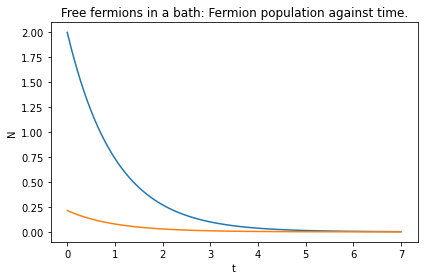

In [13]:
from IPython.display import Image
from qutip import *
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

L =  6
mean,s_dev = 0,1

def sigma_z(k):
    op_list = []
    if k<=2*L-1 and k>=0:
        for i in range(L):
            if i==k:
                op_list.append(sigmaz())
            else:
                op_list.append(qeye(2))
        op = Qobj(tensor(op_list))
        return op

    else:
        raise ValueError("Index out of range: Operator sigma_z_"+str(k)+" may not be casted in a system with "+str(2*L)+" spins. By convention first spin is labeled as 0.")

def c(k):
    if k<=2*L-1 and k>=0:
        op_list = []
        for i in range(L):
            if i==k:
                op_list.append(destroy(2))
            else:
                op_list.append(qeye(2))
        aux = Qobj(tensor(op_list))
        phase = Qobj(tensor([qeye(2)]*(L)))
        for i in range(0,k):
            phase = phase*sigma_z(i)
        op = phase*aux
        return op

    else:
        raise ValueError("Index out of range: Operator c_"+str(k)+" may not be casted in a system with "+str(2*L)+" spins. By convention first spin is labeled as 0.")
        
n_T = Qobj(tensor([Qobj(np.zeros((2,2)))]*(L)))                        #total ring B number op
for i in range(L):
    n_T += c(i).dag()*c(i)
    
V = np.zeros((L,L))
for i in range(L):
    for k in range(i,L):
        V[i,k]= np.random.normal(mean,s_dev)
        V[k,i]=V[i,k]

H = Qobj(tensor([Qobj(np.zeros((2,2)))]*L))
for i in range(L):
    for k in range(L):
        H += V[i,k]*c(i).dag()*c(k)
        
E,V = H.eigenstates()

c_ops = []
for i in range(L):
    c_ops.append(c(i))

time_array = np.linspace(0.0,7, 100)
rho_0 = V[len(V)//2]*V[len(V)//2].dag()
rho_t = mesolve(H, rho_0, time_array, c_ops, [n_T,c(1).dag()*c(1)])

plt.plot(time_array, rho_t.expect[0]);
plt.plot(time_array, rho_t.expect[1]);
plt.xlabel('t');
plt.ylabel('N');
plt.title("Free fermions in a bath: Fermion population against time.")

plt.tight_layout()
plt.savefig('output.png', dpi=300)